# K-Means 군집

#### 군집(clustering)
군집 분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 같는 관측값끼리 같은 집단으로 묶는 알고리즘

다른 집단 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 집단에도 속하지 못하는 관측값이 존재할 수 있음

이런 특성을 이용해 특정 데이터(이상값, 중복값)를 찾는데 활용가능

군집 분석은 비지도학습!

관측값을 몇 개의 집단으로 나눈다는 점에서 지도학습의 분류 알고리즘과 비슷하지만

군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과는 차이가 있음

### k-Means
k-Means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용

벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당

다른 클러스터 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 함

한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k 값에 따라 모형의 성능이 달라짐

일반적으로 k가 클수록 모형의 정확도는 개선되지만, k 값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라짐

![009-1](https://user-images.githubusercontent.com/63298243/119340766-ec144100-bccd-11eb-9b3a-6229caebfaea.png)

![Kmeans_animation_withoutWatermark](https://user-images.githubusercontent.com/63298243/126041215-aafdf5d5-04a3-4f2b-b526-8365c1fdfc8f.gif)

## Import lib & data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

### 도매 고객 데이터 세트
각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터

첫 2개 열은 상품 구매금액이 아니라 고객의 일반 정보를 담고있음

'Channel' 열은 호텔 / 레스토랑 또는 소매점 등 판매채널 값이고, 'Region' 열은 고객 소재지를 나타냄

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### 전처리

### 모델링

#### KMeans 예시
KMeans(init='k-means++', n_clusters=8, n_init=10)

#### 파라미터 설명

1. n_clusters int, 기본값 = 8
     - 형성 할 클러스터의 수와 생성 할 중심의 수

2. n_init int, 기본값 = 10
    - k- 평균 알고리즘이 다른 중심 시드로 실행되는 횟수
    - 최종 결과는 n_init 연속 실행의 최상의 출력

모델을 훈련(fit)시키면 아래처럼 "labels_" 이 만들어짐

이를 우리의 데이터프레임에 추가시켜 시각화하면 됨

## 결과물 시각화
지도 학습에서의 시각화는 모델을 돌리기전에 이상치 등을 탐지하기 위해서라면

비지도 학습에서의 시각화는 군집화가 제대로 되었는지, 혹은 결과의 해석을 위해 시각화를 한다

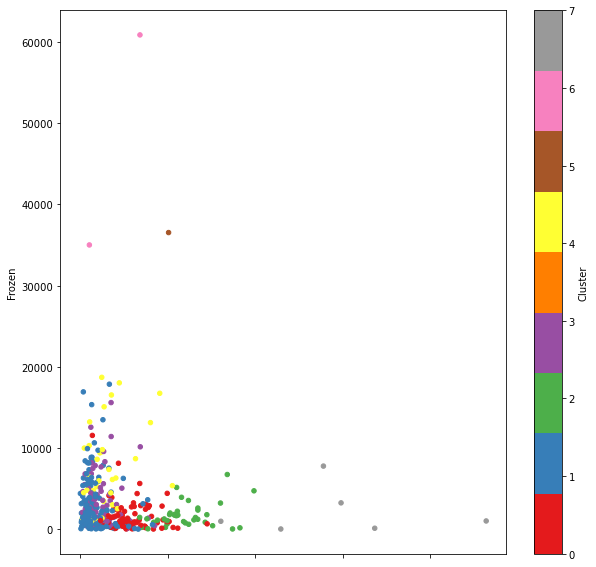

In [17]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

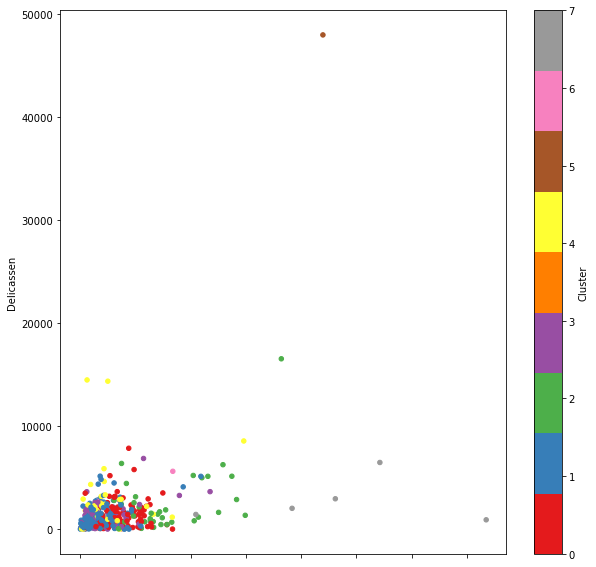

In [18]:
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

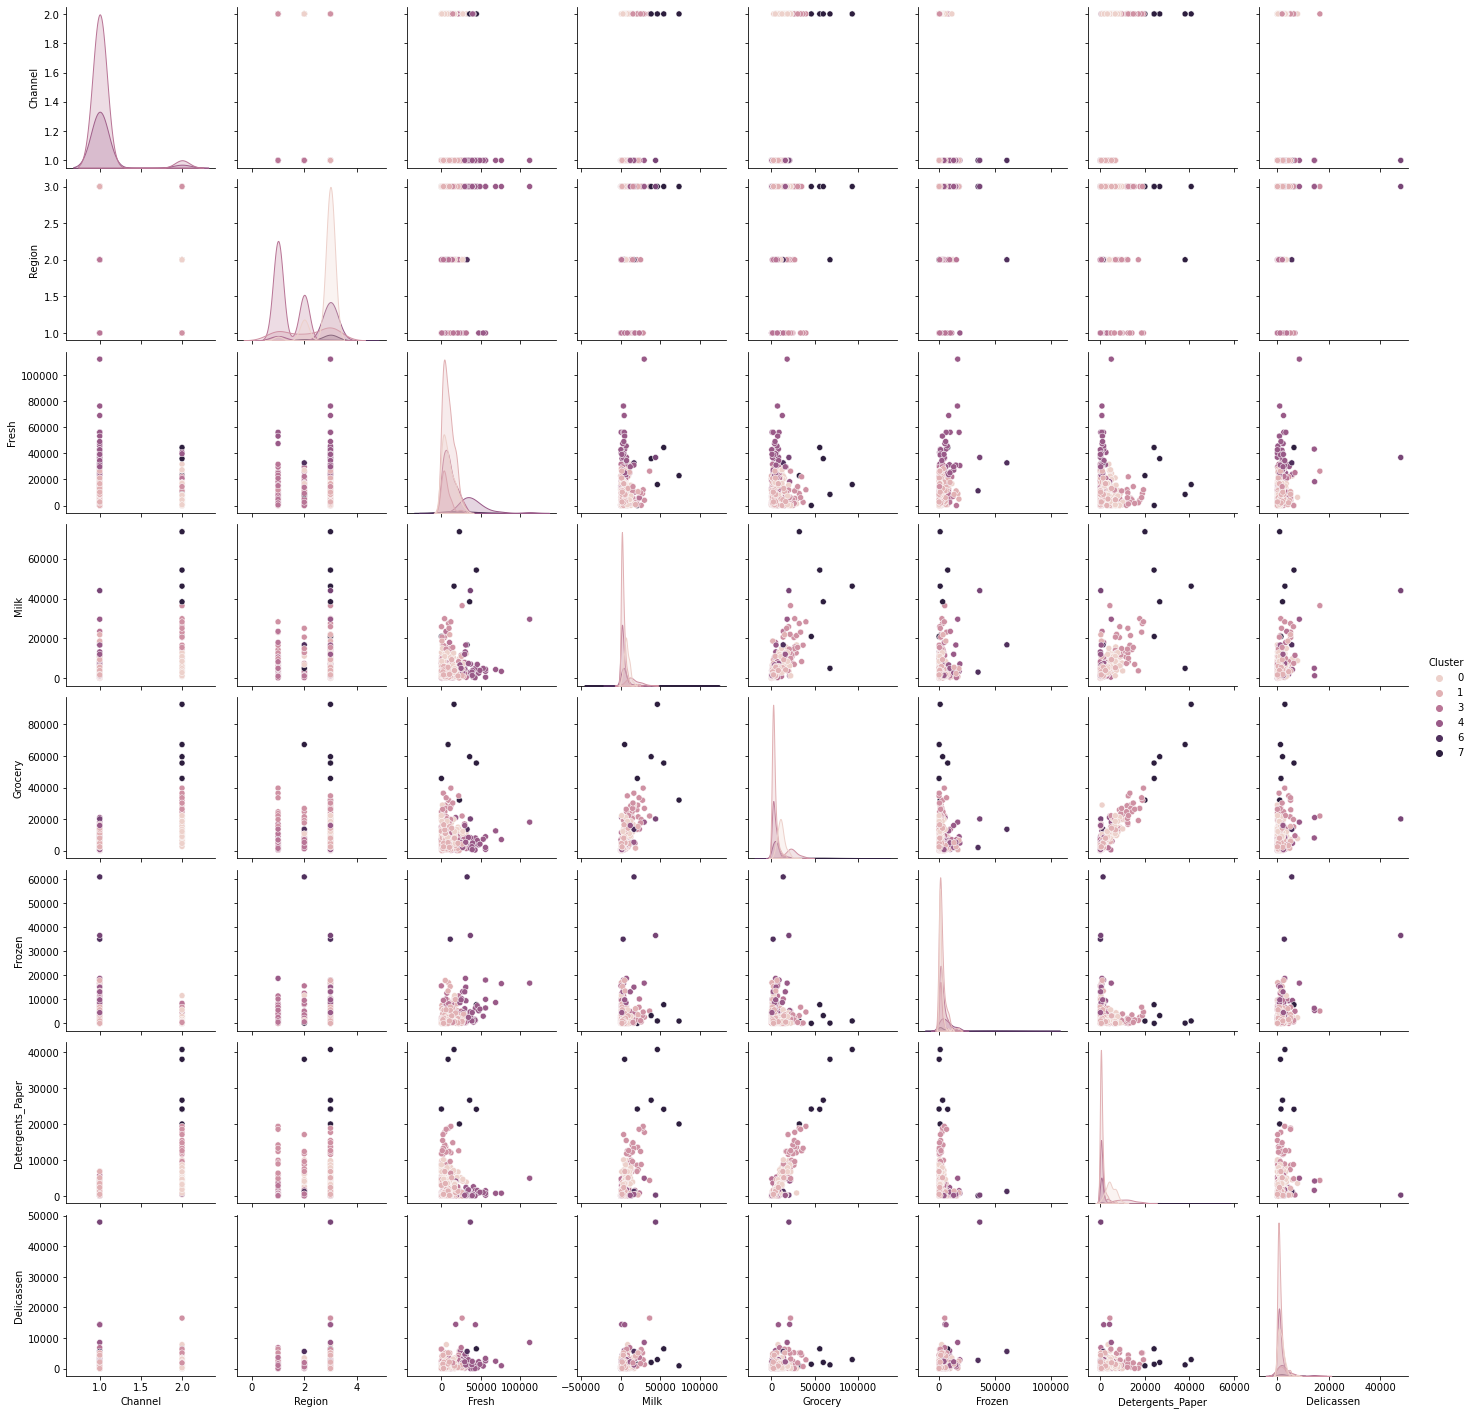

In [21]:
sns.pairplot(df,hue='Cluster')
plt.show()